In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
#import pandas_datareader as DataReader
# import pandas_datareader.data as data
from pandas_datareader import data
from datetime import datetime
from __future__ import division

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN','INTC','CSCO']

In [3]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,start='2019-1-1',end='2020-11-01',data_source='yahoo')

In [4]:
GOOG.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015


In [5]:
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 464 entries, 2018-12-31 to 2020-10-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       464 non-null    float64
 1   Low        464 non-null    float64
 2   Open       464 non-null    float64
 3   Close      464 non-null    float64
 4   Volume     464 non-null    int64  
 5   Adj Close  464 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 25.4 KB


In [6]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,464.000000,464.000000,464.000000,464.000000,4.640000e+02,464.000000
mean,1308.708090,1281.598386,1294.445649,1296.010204,1.659436e+06,1296.010204
std,163.845854,159.129637,161.309578,161.156118,7.430351e+05,161.156118
min,1047.489990,1013.536011,1016.570007,1016.059998,3.475000e+05,1016.059998
25%,1174.977478,1146.118713,1158.587524,1162.760040,1.213000e+06,1162.760040
50%,1269.479980,1247.914978,1256.729980,1262.544983,1.466100e+06,1262.544983
75%,1448.769989,1423.882477,1439.247498,1438.592499,1.836975e+06,1438.592499
max,1733.180054,1666.329956,1709.713989,1728.280029,6.207000e+06,1728.280029


# Change in price

<AxesSubplot:xlabel='Date'>

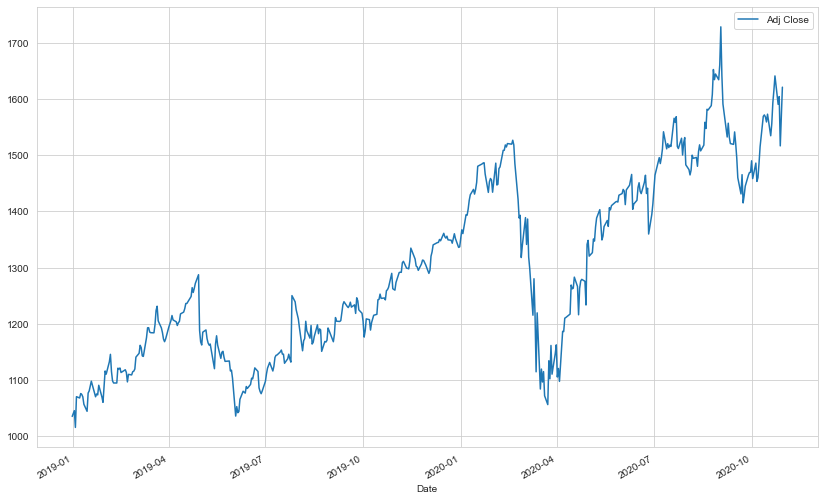

In [7]:
GOOG['Adj Close'].plot(legend=True,figsize=(14,9))

<AxesSubplot:xlabel='Date'>

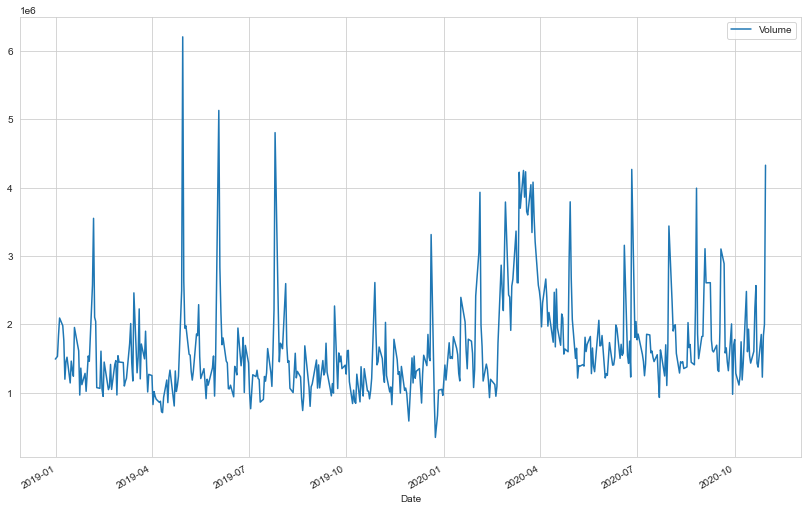

In [8]:
GOOG['Volume'].plot(legend=True,figsize=(14,9))

# moving average of various stocks

consider 10,20,50 days

In [9]:
days = [10,20,50]

for ma in days:
    column_name = "Mov Avg for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

In [10]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close,Mov Avg for 10 days,Mov Avg for 20 days,Mov Avg for 50 days
Date,,,,,,,,,
2020-10-26,116.550003,112.879997,114.010002,115.050003,111850700.0,114.851852,117.619079,116.749080,117.224259
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,116.399178,117.169853,116.874364,117.264041
2020-10-28,115.430000,111.099998,115.050003,111.199997,143937800.0,111.008476,116.172573,116.644260,117.176941
2020-10-29,116.930000,112.199997,112.370003,115.320000,146129200.0,115.121384,115.634501,116.570887,117.169204
2020-10-30,111.989998,107.720001,111.059998,108.860001,190272600.0,108.672516,114.620251,116.363245,116.981228


<AxesSubplot:xlabel='Date'>

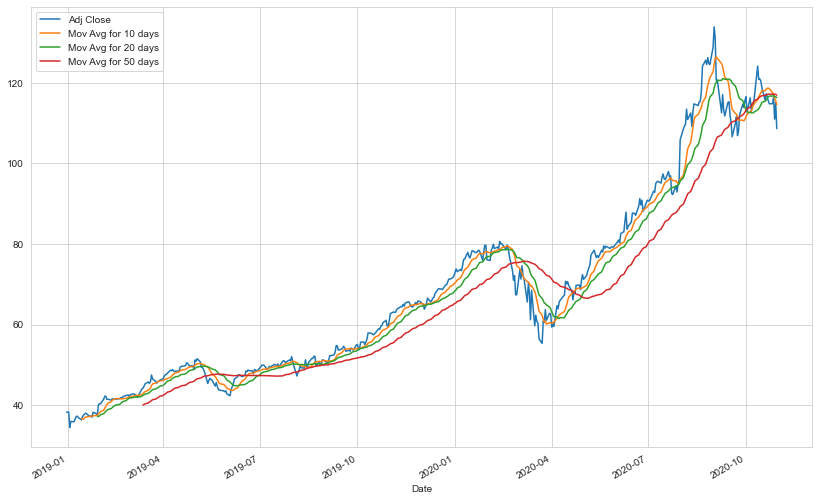

In [11]:
AAPL[['Adj Close','Mov Avg for 10 days','Mov Avg for 20 days','Mov Avg for 50 days']].plot(subplots=False,figsize=(14,9))

# Daily return Average

In [12]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [13]:
AAPL['Daily Return'].tail()

Date
2020-10-26    0.000087
2020-10-27    0.013472
2020-10-28   -0.046312
2020-10-29    0.037050
2020-10-30   -0.056018
Name: Daily Return, dtype: float64

<AxesSubplot:xlabel='Date'>

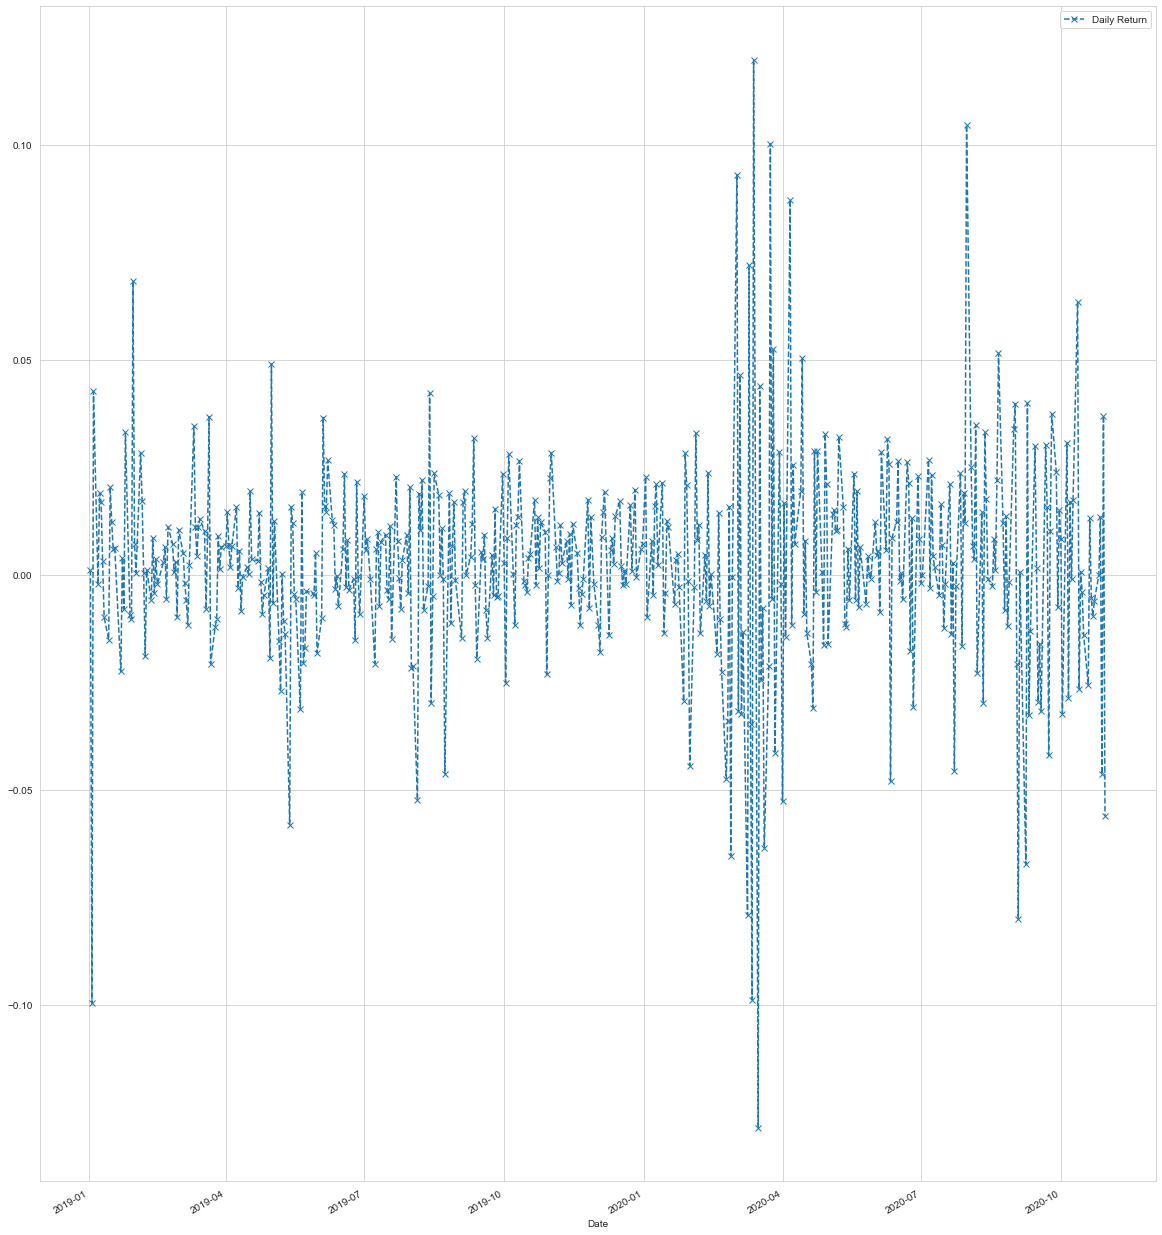

In [14]:
AAPL['Daily Return'].plot(figsize=(20,24),legend=True,linestyle='--',marker='x')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

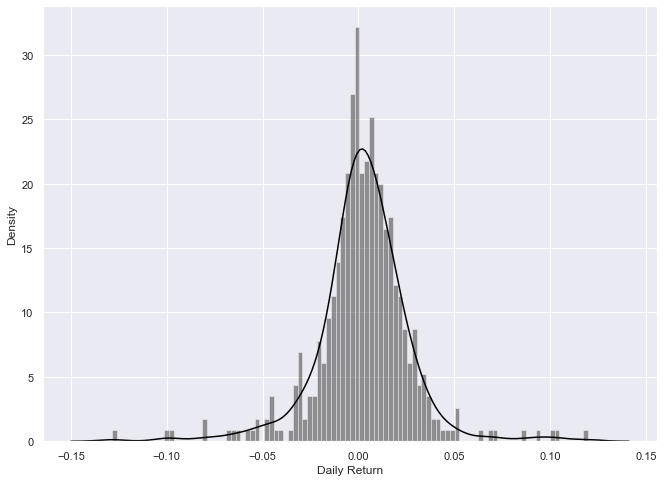

In [15]:
sns.set(rc={'figure.figsize':(11.0,8.0)})
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='black')

# Correlation btw daily returns of various stocks

In [16]:
adj_close_df = data.DataReader(tech_list,start='2019-1-1',end='2020-11-01',data_source='yahoo')['Adj Close']

In [17]:

adj_close_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,INTC,CSCO
Date,,,,,,
2020-10-26,114.851852,1590.449951,209.531433,3207.040039,46.382637,37.669998
2020-10-27,116.399178,1604.260010,212.693161,3286.330078,45.310432,36.869999
2020-10-28,111.008476,1516.619995,202.150757,3162.780029,43.930473,35.709999
2020-10-29,115.121384,1567.239990,204.185425,3211.010010,43.791485,35.689999
2020-10-30,108.672516,1621.010010,201.941315,3036.149902,43.960255,35.900002


In [18]:
r_df = adj_close_df.pct_change()

In [19]:
r_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN,INTC,CSCO
Date,,,,,,
2020-10-26,0.000087,-0.030804,-0.028442,0.000824,-0.030705,-0.029624
2020-10-27,0.013472,0.008683,0.015090,0.024724,-0.023117,-0.021237
2020-10-28,-0.046312,-0.054630,-0.049566,-0.037595,-0.030456,-0.031462
2020-10-29,0.037050,0.033377,0.010065,0.015249,-0.003164,-0.000560
2020-10-30,-0.056018,0.034309,-0.010991,-0.054456,0.003854,0.005884


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


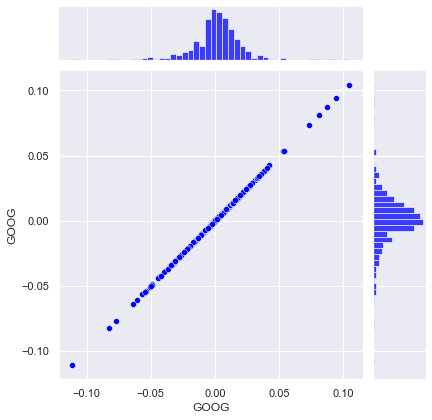

In [20]:
sns.jointplot('GOOG','GOOG',r_df,kind='scatter',color='blue')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


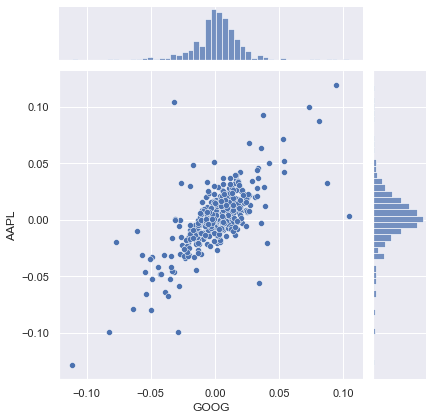

In [21]:

sns.jointplot('GOOG','AAPL',r_df,kind='scatter')

with other stocks

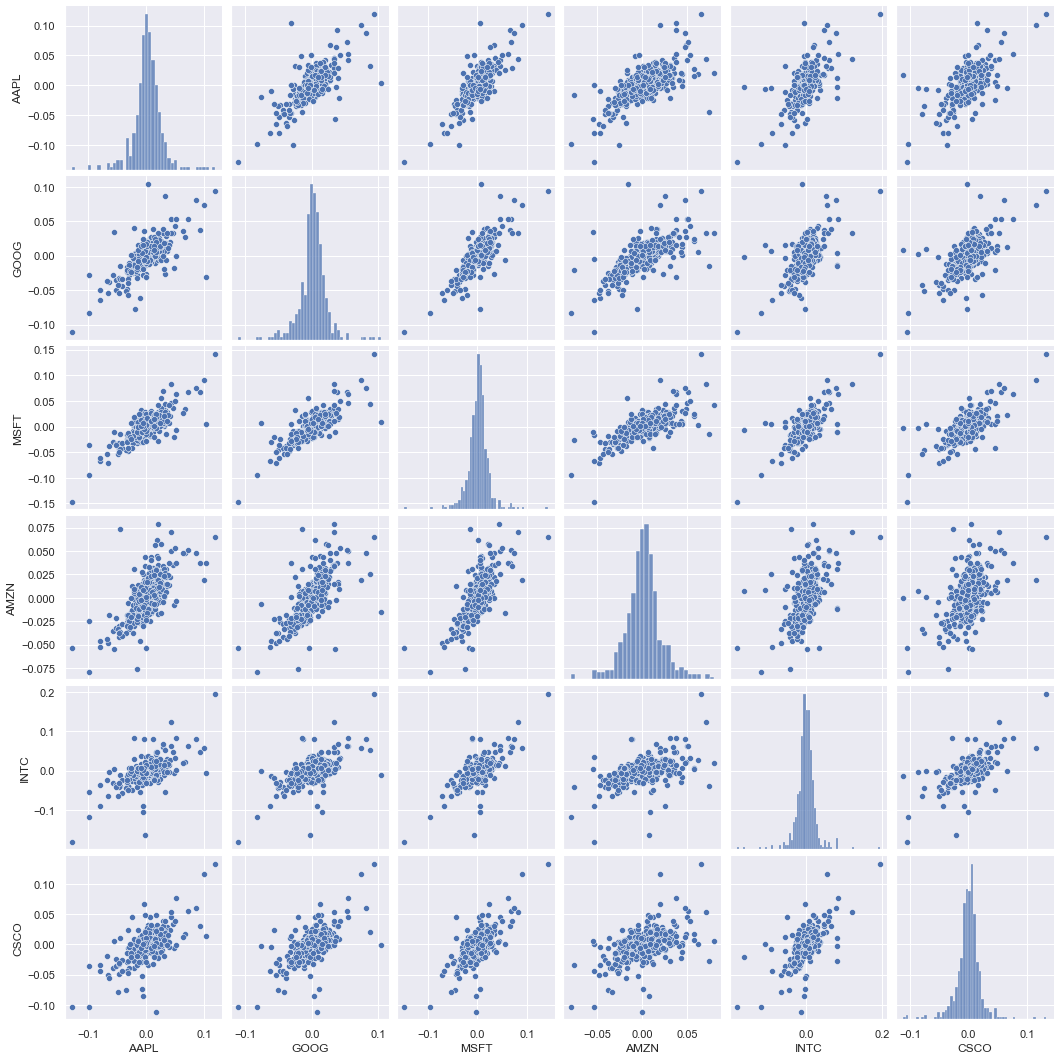

In [22]:
sns.pairplot(r_df.dropna())

In [23]:
r_df.corr()

Symbols,AAPL,GOOG,MSFT,AMZN,INTC,CSCO
Symbols,,,,,,
AAPL,1.000000,0.708184,0.800631,0.674101,0.634153,0.652060
GOOG,0.708184,1.000000,0.799657,0.664446,0.597006,0.624159
MSFT,0.800631,0.799657,1.000000,0.723743,0.703619,0.705524
AMZN,0.674101,0.664446,0.723743,1.000000,0.494110,0.516780
INTC,0.634153,0.597006,0.703619,0.494110,1.000000,0.644419
CSCO,0.652060,0.624159,0.705524,0.516780,0.644419,1.000000


In [24]:
r_df.corr()['AAPL'].sort_values(ascending=False)

Symbols
AAPL    1.000000
MSFT    0.800631
GOOG    0.708184
AMZN    0.674101
CSCO    0.652060
INTC    0.634153
Name: AAPL, dtype: float64

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

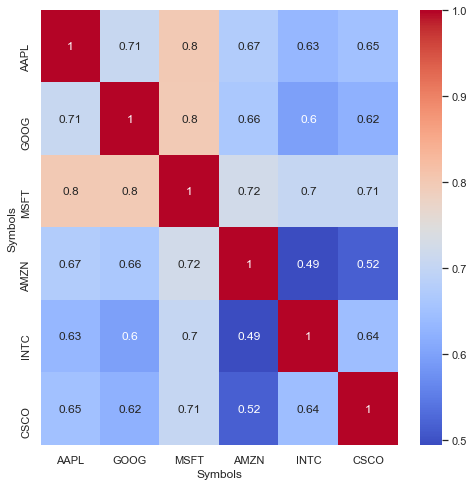

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(r_df.corr(), annot=True, cmap="coolwarm")

# Investment value at risk

In [26]:
rt = r_df.dropna()

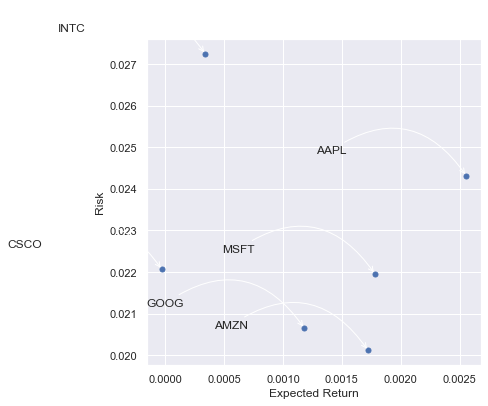

In [27]:
plt.figure(figsize=(6,6))

plt.scatter(rt.mean(),rt.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')



for label,x,y in zip(rt.columns,rt.mean(),rt.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

We see that Google and Amazon are safe stocks to buy as they have lower risk and higher returns. Intel Stocks seem to be most risky stocks to buy as they have higher risk and lower expected return.

# Value at Risk

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

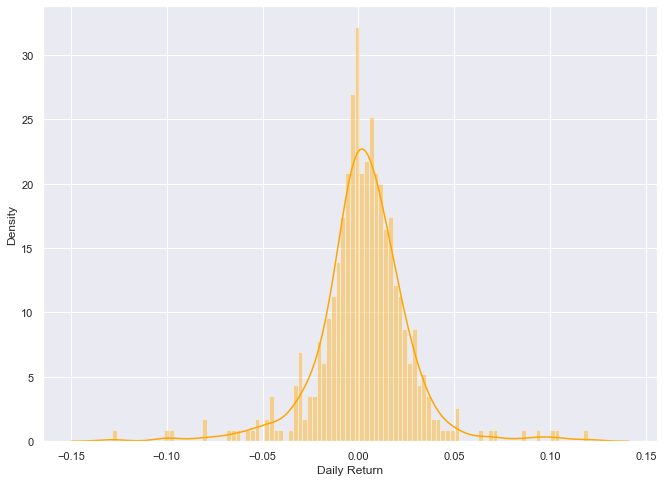

In [28]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='orange')

In [29]:
rt['AAPL'].quantile(0.05)

-0.03242131256944504

worst case daily loss will not be more than 3.2% of invested amount

In [30]:
days = 365
dt = 1/365
mu = rt.mean()['GOOG']
sigma = rt.std()['GOOG']

In [31]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

In [32]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,1052.699951,1023.590027,1050.959961,1035.609985,1493300,1035.609985
2019-01-02,1052.319946,1015.710022,1016.570007,1045.849976,1532600,1045.849976
2019-01-03,1056.979980,1014.070007,1041.000000,1016.059998,1841100,1016.059998
2019-01-04,1070.839966,1027.417969,1032.589966,1070.709961,2093900,1070.709961
2019-01-07,1074.000000,1054.760010,1071.500000,1068.390015,1981900,1068.390015


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

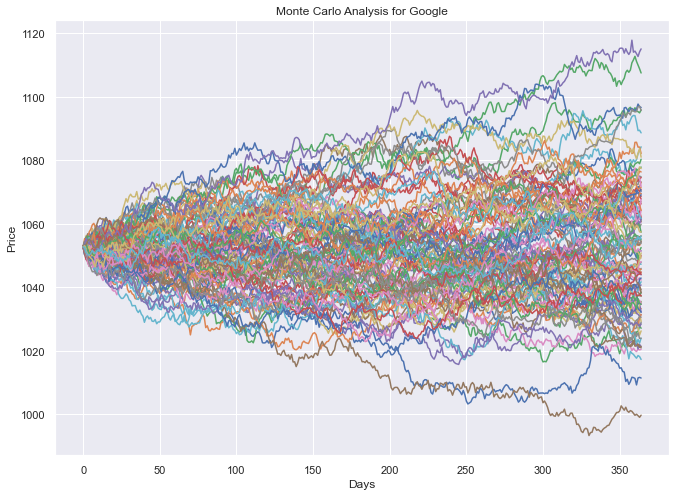

In [33]:
start_price = 1052.699951 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [35]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

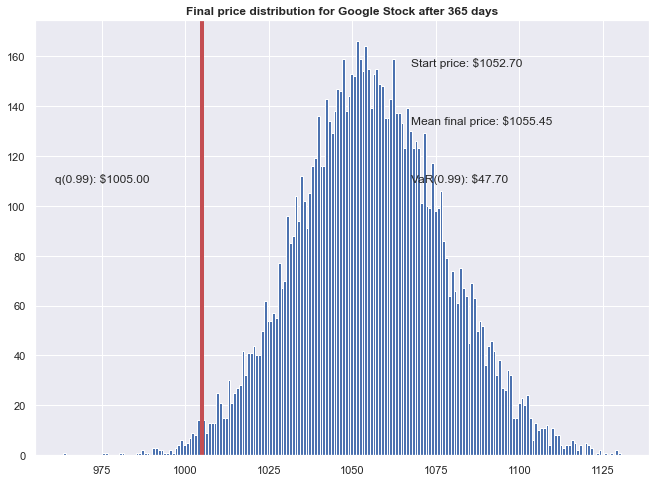

In [36]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')